In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import cv2
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#  Data Cleaning

In [2]:

# Define the file path to folders of apple vairieties.
DataDir = 'C:\\Users\\User\\Documents\\Future\\DATA Science\\Data Science Projects\\Apple Variety'
Categories = ['braeburn','bramley','cox','gala','russet'] #Define Category names (names of the folders)

for category in Categories:
    path = os.path.join(DataDir,category) #path to different categories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))

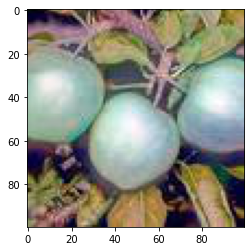

In [3]:
#Choose image size
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)

In [4]:
#Create empty training dataset
training_data = []

#Create function that fetches all teh images from the different folders and append the associated label (folder name)
def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir, category) #path to different categories
        label = category
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,label])

In [5]:

#Apply function
create_training_data()

In [6]:
#Shuffle data
import random

random.shuffle(training_data)

In [7]:
#Create  empty X and y lists to fill
X=[]
y=[]

In [8]:
#Create loop appending image array(features) to X and labels to y
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

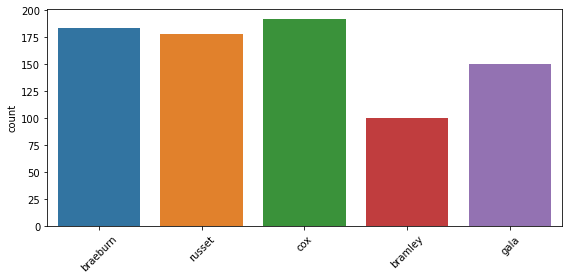

In [9]:
#Check counts of the categories
plt.figure(figsize=(8,4))
chart = sns.countplot(y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.tight_layout()

In [10]:
#Normalize image data by dividing by the max RGB value

X = X/255

In [12]:
#Convert label values to numbers to allow keras to process them
y_df = pd.DataFrame(y)
y1 = y_df[0].map({'braeburn':0,'bramley':1,'cox':2,'gala':3,'russet':4})

In [13]:
y = np.array(y1)
y

array([0, 0, 4, 2, 0, 2, 4, 0, 2, 2, 4, 4, 2, 4, 1, 4, 0, 2, 1, 4, 2, 1,
       2, 2, 0, 2, 4, 2, 0, 2, 1, 4, 0, 2, 2, 0, 4, 0, 1, 0, 2, 4, 4, 0,
       0, 3, 1, 0, 2, 4, 0, 2, 2, 3, 4, 4, 4, 2, 4, 1, 2, 3, 2, 2, 3, 3,
       2, 0, 4, 1, 3, 0, 2, 0, 3, 0, 0, 4, 3, 0, 2, 3, 4, 2, 3, 4, 3, 4,
       4, 4, 3, 1, 4, 3, 2, 2, 1, 0, 3, 4, 3, 2, 1, 0, 2, 0, 2, 2, 2, 2,
       4, 1, 2, 0, 2, 4, 1, 0, 1, 3, 4, 4, 1, 0, 4, 2, 1, 0, 1, 3, 2, 1,
       2, 4, 2, 3, 2, 0, 1, 0, 1, 3, 2, 4, 0, 4, 0, 2, 4, 2, 4, 0, 1, 1,
       3, 0, 4, 4, 3, 0, 2, 3, 4, 3, 0, 1, 3, 0, 0, 4, 1, 2, 3, 2, 3, 2,
       0, 4, 4, 3, 4, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 2, 2, 0, 4, 2,
       4, 0, 2, 1, 0, 2, 4, 3, 2, 0, 4, 0, 0, 4, 2, 1, 0, 3, 2, 0, 2, 2,
       0, 4, 3, 4, 2, 4, 0, 4, 4, 4, 3, 4, 2, 2, 1, 3, 2, 2, 0, 0, 4, 3,
       0, 1, 3, 0, 1, 4, 0, 4, 2, 3, 3, 0, 3, 0, 3, 0, 4, 2, 4, 4, 4, 2,
       0, 2, 2, 1, 4, 0, 4, 1, 0, 4, 3, 0, 3, 4, 2, 0, 0, 0, 0, 4, 0, 2,
       0, 2, 2, 3, 2, 2, 3, 2, 0, 1, 0, 4, 0, 4, 0,

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
#Define number of classes
num_classes = 5

 **Create class weights to compensate for different class sizes**

In [18]:
from sklearn.utils import class_weight

In [19]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4], y=[4 3 3 1 3 0 2 3 2 3 1 3 4 0 4 4 4 0 2 4 4 0 4 3 3 0 4 2 3 4 0 2 2 3 4 3 4
 4 0 0 2 2 4 4 2 0 4 0 3 3 1 4 0 3 4 2 4 0 0 2 4 2 2 3 3 0 2 3 3 4 4 0 0 2
 4 2 4 0 3 3 3 2 4 2 2 3 4 0 1 0 2 0 3 1 0 0 4 4 4 0 0 1 2 4 3 0 2 2 3 0 0
 4 3 1 4 2 0 1 4 2 2 3 3 0 0 0 2 3 4 1 1 4 3 0 4 4 1 4 4 1 4 0 0 3 2 1 4 1
 3 3 0 2 1 3 2 0 2 0 2 4 2 4 1 3 0 4 1 0 0 3 3 2 2 3 2 2 1 4 3 0 1 1 2 2 2
 0 1 0 2 0 4 1 2 0 0 3 2 3 0 0 3 1 2 0 4 2 2 0 4 2 3 0 2 4 3 0 2 0 1 0 2 4
 0 2 2 1 4 0 0 3 2 4 4 4 4 2 1 3 3 1 2 0 3 2 4 3 2 0 2 2 0 4 3 2 4 1 4 4 3
 3 1 4 0 1 2 3 2 2 3 2 0 3 0 0 1 0 4 1 1 0 2 3 1 0 1 0 3 0 3 3 0 4 1 0 3 2
 2 3 4 2 0 0 0 0 3 4 4 3 4 4 4 2 0 2 0 3 2 4 2 2 4 0 0 4 4 0 2 0 2 1 1 3 0
 4 1 2 3 3 0 0 2 2 2 1 4 4 3 3 3 4 1 0 0 3 2 2 0 1 3 2 2 2 4 3 2 4 0 2 0 1
 0 2 3 4 4 0 1 1 2 1 2 2 0 3 4 4 0 4 0 0 0 0 3 1 4 4 4 1 2 2 4 0 2 1 3 2 2
 0 1 0 0 2 1 3 3 3 1 0 2 0 0 2 2 2 2 3 3 4 2 2 4 0

# Building the model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [30]:
# create data generator for data augmentation
datagen = ImageDataGenerator(shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [31]:
it = datagen.flow(X_train, y_train,batch_size=10)

In [37]:
model4 = Sequential()

model4.add(Conv2D(16, 3,padding='same',input_shape = (100,100,3)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D())
model4.add(Dropout(0.1))

model4.add(Conv2D(32, 3,padding='same'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D())
model4.add(Dropout(0.1))

model4.add(Conv2D(64, 3,padding='same'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D())
model4.add(Dropout(0.1))


model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.1))

          
model4.add(Dense(num_classes,activation='softmax'))

es = EarlyStopping(monitor='val_acc', mode='max', verbose=0, patience=10)
mc = ModelCheckpoint('./best_model.apples', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
          
model4.compile(loss= 'sparse_categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [38]:
model4.fit_generator(it,steps_per_epoch = 54 ,epochs = 100, callbacks=[es,mc], validation_data=(X_test, y_test))

Epoch 1/100
266/266 [==============================] - 2s 8ms/sample - loss: 1.6293 - acc: 0.2331

Epoch 00001: val_acc improved from -inf to 0.23308, saving model to ./best_model.apples
54/54 [==============================] - 14s 268ms/step - loss: 1.9127 - acc: 0.2361 - val_loss: 1.6286 - val_acc: 0.2331
Epoch 2/100
266/266 [==============================] - 3s 10ms/sample - loss: 1.4127 - acc: 0.4586

Epoch 00002: val_acc improved from 0.23308 to 0.45865, saving model to ./best_model.apples
54/54 [==============================] - 17s 312ms/step - loss: 1.5304 - acc: 0.2770 - val_loss: 1.4129 - val_acc: 0.4586
Epoch 3/100
266/266 [==============================] - 3s 11ms/sample - loss: 1.2188 - acc: 0.4962

Epoch 00003: val_acc improved from 0.45865 to 0.49624, saving model to ./best_model.apples
54/54 [==============================] - 18s 331ms/step - loss: 1.2976 - acc: 0.3755 - val_loss: 1.2168 - val_acc: 0.4962
Epoch 4/100
266/266 [==============================] - 3s 13ms/sa

Epoch 30/100
266/266 [==============================] - 2s 7ms/sample - loss: 0.9865 - acc: 0.7030

Epoch 00030: val_acc did not improve from 0.71429
54/54 [==============================] - 14s 268ms/step - loss: 0.3676 - acc: 0.8680 - val_loss: 1.0136 - val_acc: 0.7030
Epoch 31/100
266/266 [==============================] - 2s 7ms/sample - loss: 1.0402 - acc: 0.6955

Epoch 00031: val_acc did not improve from 0.71429
54/54 [==============================] - 15s 269ms/step - loss: 0.3522 - acc: 0.8755 - val_loss: 1.0478 - val_acc: 0.6955


In [42]:
from tensorflow.keras.models import load_model

In [43]:
model4 = load_model('./best_model.apples')

In [45]:
pred4 = model4.predict_classes(X_test)


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred4))

[[31  2 13 14  2]
 [ 0 28  2  0  1]
 [ 8  1 42  6  6]
 [ 5  0  4 39  0]
 [ 1  1 10  0 50]]


In [50]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        62
           1       0.88      0.90      0.89        31
           2       0.59      0.67      0.63        63
           3       0.66      0.81      0.73        48
           4       0.85      0.81      0.83        62

    accuracy                           0.71       266
   macro avg       0.73      0.74      0.73       266
weighted avg       0.72      0.71      0.71       266

